# Load packages

In [1]:
# Loading the required packages to run this notebook
from src.visualisation.SummaryModels import SummaryModels
import pandas as pd

# Default model setup - Fishing vessels only - Same dates & ROI 
Use the VRNN model, 100 dimensional latent and recurrent laten space, and no batch normalization, scheduler, or KL annealing. Compare results for fishing vessels, cargo and tankers, and fishing, cargo, and tankers. The comparison is done on the fishing vessel only validation set used during the training of fishing vessel VRNN model (see 'Explore Training & Validation Curves - Fishing Vessels.ipynb')

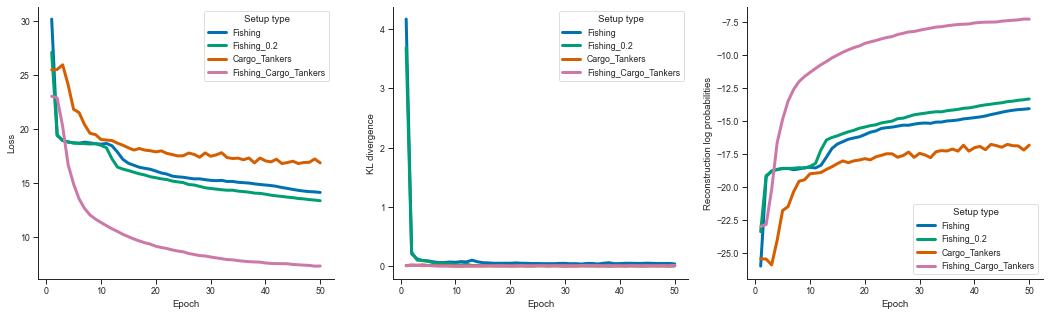

In [2]:
# Use the SummaryModels class
setup_type = "Fishing"
model_prefix = "Fishing_vessels_only_"
fishing_file = "RegionBornholm_01062019_30092019_Fish_14400_86400_600"
summary_models_fish = SummaryModels("RegionBornholm_01062019_30092019_Fish_14400_86400_600", model_prefix=model_prefix)
df_fish = summary_models_fish.load_curves_df(setup_type, validation_only=True)
df_track_lvl_fish = summary_models_fish.run_evaluation(setup_type=setup_type, fishing_file=fishing_file)["TrajectoryLevelData"]

setup_type = "Fishing_0.2"
summary_models_fish_02 = SummaryModels("RegionBornholm_01062019_30092019_Fish_14400_86400_600_Injected02",
                                    model_prefix=model_prefix)
df_fish_02 = summary_models_fish_02.load_curves_df(setup_type, validation_only=True)
df_track_lvl_fish_02 = summary_models_fish_02.run_evaluation(setup_type=setup_type, 
                                                             fishing_file=fishing_file)["TrajectoryLevelData"]

setup_type = "Cargo_Tankers"
summary_models_carg_tank = SummaryModels("RegionBornholm_01062019_30092019_CargTank_14400_86400_600", model_prefix=model_prefix)
df_carg_tank = summary_models_carg_tank.load_curves_df(setup_type, validation_only=True)
df_track_lvl_carg_tank = summary_models_carg_tank.run_evaluation(setup_type=setup_type,
                                                                 fishing_file=fishing_file)["TrajectoryLevelData"] 

setup_type = "Fishing_Cargo_Tankers"
summary_models_fish_carg_tank = SummaryModels("RegionBornholm_01062019_30092019_FishCargTank_14400_86400_600",
                                              model_prefix=model_prefix)
df_fish_carg_tank = summary_models_fish_carg_tank.load_curves_df(setup_type, validation_only=True)
df_track_lvl_fish_carg_tank = summary_models_fish_carg_tank.run_evaluation(setup_type=setup_type, 
                                                                           fishing_file=fishing_file)["TrajectoryLevelData"] 

# Combine the different vessel type date frames 
df = pd.concat([df_fish, df_fish_02, df_carg_tank, df_fish_carg_tank])
df.reset_index(drop=True, inplace=True)

# Plot the learning curves
hue = "Setup type"
hue_order = ["Fishing", "Fishing_0.2", "Cargo_Tankers", "Fishing_Cargo_Tankers"]
summary_models_fish_carg_tank.plot_curves(df[df["Data set type"] == "Validation"], hue, hue_order)

### Tajectory (sum of points) and equally weighted point based reconstruction log probabilities

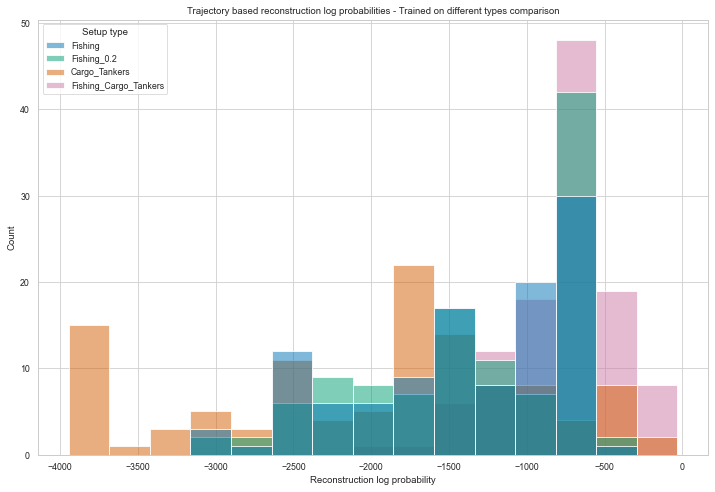

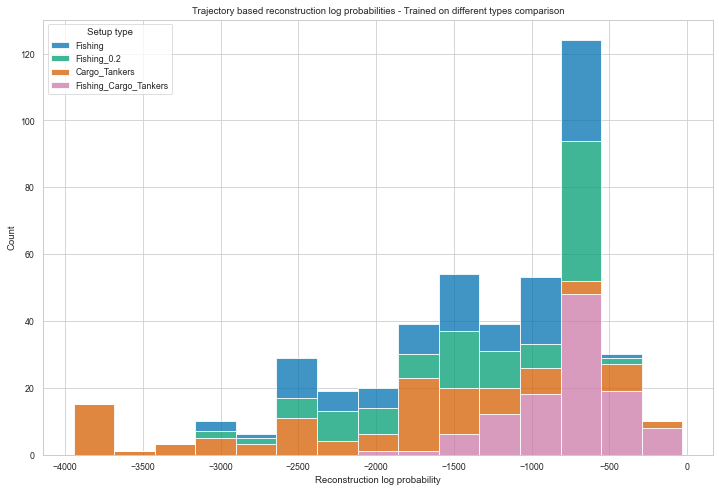

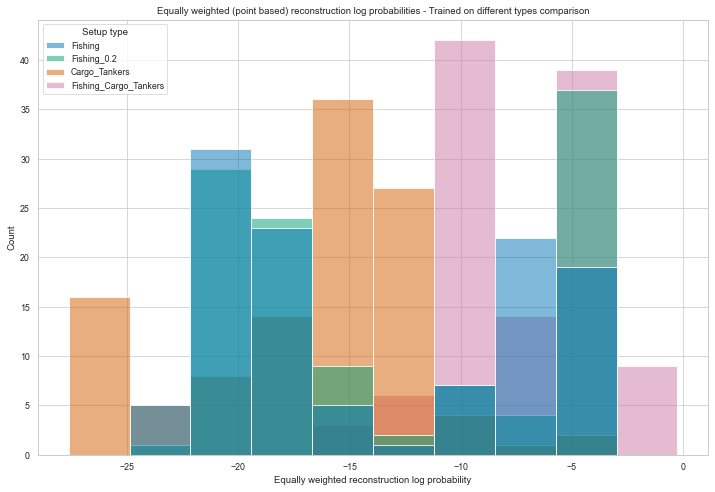

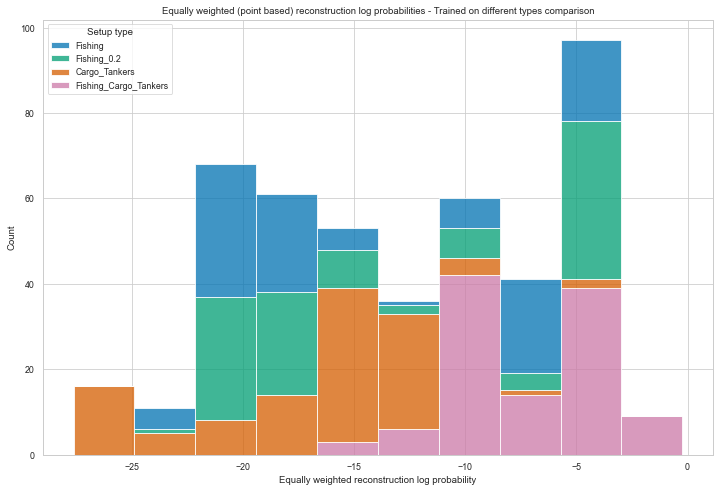

,count,mean,std,min,25%,50%,75%,max
Setup type,,,,,,,,
Cargo_Tankers,113.0,-16.826946,5.251991,-27.640781,-20.266168,-14.890006,-13.641517,-3.783516
Fishing,113.0,-14.051369,6.925347,-23.160848,-20.822369,-17.649681,-6.123300,-4.328896
Fishing_0.2,113.0,-13.314154,6.656942,-22.187301,-19.458951,-16.522543,-5.352870,-3.146610
Fishing_Cargo_Tankers,113.0,-7.249503,3.279391,-16.478197,-9.728638,-7.733420,-4.653950,-0.234758


In [3]:
# Combine the different vessel type date frames
df_recon = pd.concat([df_track_lvl_fish, df_track_lvl_fish_02, df_track_lvl_carg_tank, df_track_lvl_fish_carg_tank])
df_recon.reset_index(drop=True, inplace=True)

# Plot trajectory based reconstruction log probabilities for fishing vessels
title = "Trajectory based reconstruction log probabilities - Trained on different types comparison"
x = "Reconstruction log probability"
summary_models_fish_carg_tank.hist_stacked_plot(df_recon, type="Histogram", x=x, title=title, hue=hue, hue_order=hue_order)
summary_models_fish_carg_tank.hist_stacked_plot(df_recon, type="Stacked", x=x, title=title, hue=hue, hue_order=hue_order)

# Plot equally weighted (point based) reconstruction log probabilities for fishing vessels
title = "Equally weighted (point based) reconstruction log probabilities - Trained on different types comparison"
x = "Equally weighted reconstruction log probability"
summary_models_fish_carg_tank.hist_stacked_plot(df_recon, type="Histogram", x=x, title=title, hue=hue, hue_order=hue_order)
summary_models_fish_carg_tank.hist_stacked_plot(df_recon, type="Stacked", x=x, title=title, hue=hue, hue_order=hue_order)
df_recon.groupby(hue)[x].describe()

# Default model setup - Fishing vessels only - Different dates 
Use the VRNN model, 100 dimensional latent and recurrent laten space, and no batch normalization, scheduler, or KL annealing. The comparison is now done on the new fishing vessel only validation set sampled from 01.05.2019 - 31.05.2019

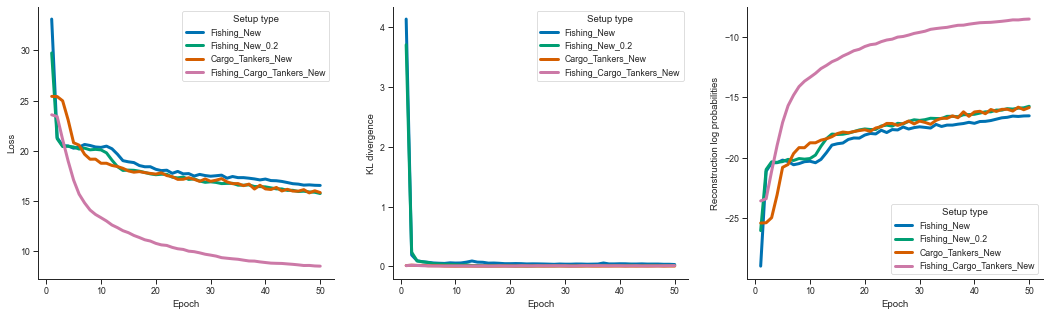

In [4]:
# Use the SummaryModels class
setup_type = "Fishing_New"
model_prefix = "New_Fishing_vessels_only_"
fishing_new_file = "RegionBornholm_01052019_31052019_Fish_14400_86400_600"
summary_models_fish = SummaryModels("RegionBornholm_01062019_30092019_Fish_14400_86400_600", model_prefix=model_prefix)
df_fish = summary_models_fish.load_curves_df(setup_type, validation_only=True)
df_track_lvl_fish = summary_models_fish.run_evaluation(setup_type=setup_type,
                                                       fishing_new_file=fishing_new_file)["TrajectoryLevelData"] 

setup_type = "Fishing_New_0.2"
summary_models_fish_02 = SummaryModels("RegionBornholm_01062019_30092019_Fish_14400_86400_600_Injected02", 
                                       model_prefix=model_prefix)
df_fish_02 = summary_models_fish_02.load_curves_df(setup_type, validation_only=True)
df_track_lvl_fish_02 = summary_models_fish_02.run_evaluation(setup_type=setup_type,
                                                             fishing_new_file=fishing_new_file)["TrajectoryLevelData"] 


setup_type = "Cargo_Tankers_New"
summary_models_carg_tank = SummaryModels("RegionBornholm_01062019_30092019_CargTank_14400_86400_600", model_prefix=model_prefix)
df_carg_tank = summary_models_carg_tank.load_curves_df(setup_type, validation_only=True)
df_track_lvl_carg_tank = summary_models_carg_tank.run_evaluation(setup_type=setup_type,
                                                                 fishing_new_file=fishing_new_file)["TrajectoryLevelData"] 

setup_type = "Fishing_Cargo_Tankers_New"
summary_models_fish_carg_tank = SummaryModels("RegionBornholm_01062019_30092019_FishCargTank_14400_86400_600", 
                                              model_prefix=model_prefix)
df_fish_carg_tank = summary_models_fish_carg_tank.load_curves_df(setup_type, validation_only=True)
df_track_lvl_fish_carg_tank = summary_models_fish_carg_tank.run_evaluation(setup_type=setup_type, 
                                                                           fishing_new_file=fishing_new_file)["TrajectoryLevelData"] 

# Combine the different vessel type date frames 
df_new = pd.concat([df_fish, df_fish_02, df_carg_tank, df_fish_carg_tank])
df_new.reset_index(drop=True, inplace=True)

# Plot the learning curves
hue_order = ["Fishing_New", "Fishing_New_0.2", "Cargo_Tankers_New", "Fishing_Cargo_Tankers_New"]
summary_models_fish_carg_tank.plot_curves(df_new[df_new["Data set type"] == "Validation"], hue, hue_order)

### Tajectory (sum of points) and equally weighted point based reconstruction log probabilities

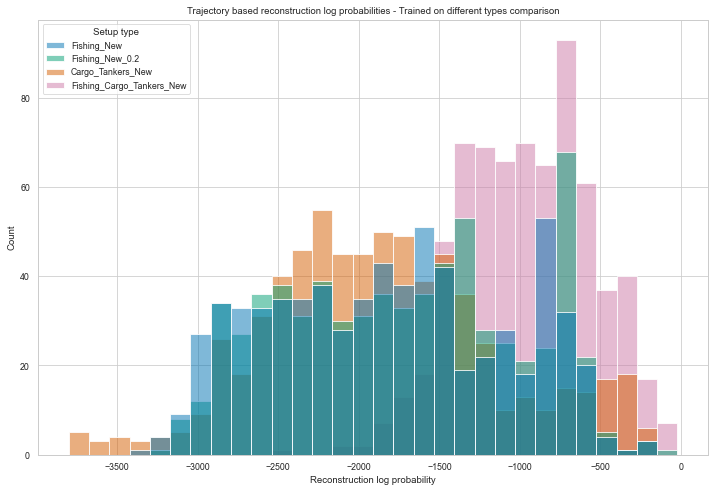

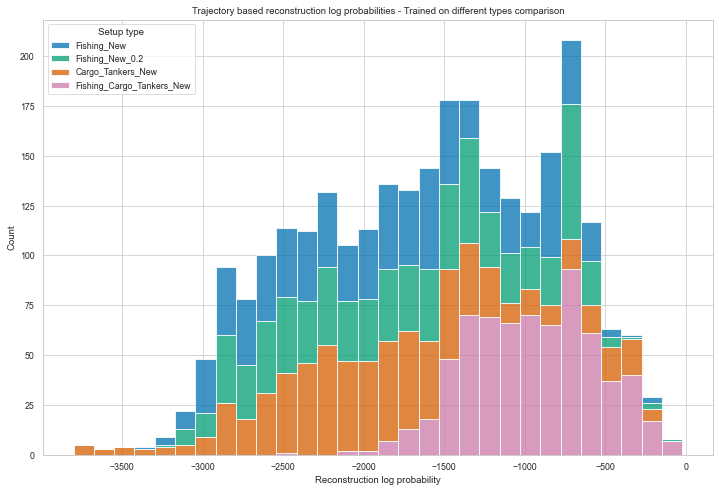

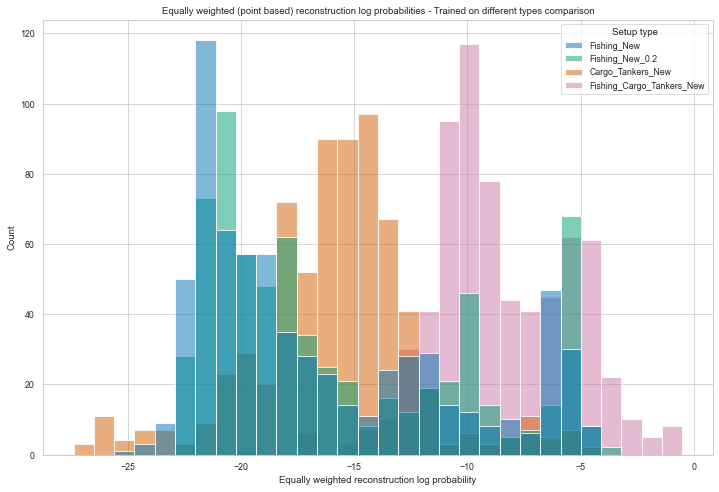

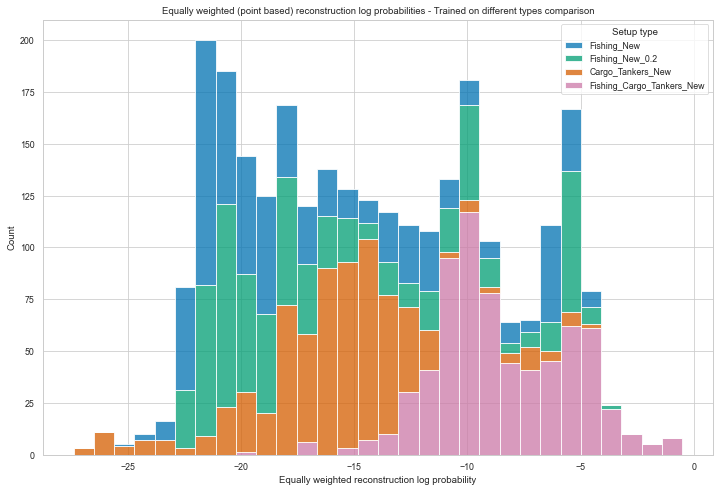

,count,mean,std,min,25%,50%,75%,max
Setup type,,,,,,,,
Cargo_Tankers_New,686.0,-15.835592,3.637731,-27.400067,-17.708003,-15.574127,-14.002349,-4.974813
Fishing_Cargo_Tankers_New,686.0,-8.511259,3.000644,-19.765467,-10.524469,-9.215098,-5.965547,-0.506058
Fishing_New,686.0,-16.523659,5.569448,-25.411160,-21.198033,-18.656242,-12.499478,-4.427197
Fishing_New_0.2,686.0,-15.730868,5.627279,-22.800878,-20.483210,-17.949691,-10.552170,-3.902050


In [5]:
# Combine the different vessel type date frames
df_recon = pd.concat([df_track_lvl_fish, df_track_lvl_fish_02, df_track_lvl_carg_tank, df_track_lvl_fish_carg_tank])
df_recon.reset_index(drop=True, inplace=True)

# Plot trajectory based reconstruction log probabilities for the new fishing vessel trajectories
bins = 30
title = "Trajectory based reconstruction log probabilities - Trained on different types comparison"
x = "Reconstruction log probability"
summary_models_fish_carg_tank.hist_stacked_plot(df_recon, type="Histogram", x=x, bins=bins,
                                                title=title,  hue=hue, hue_order=hue_order)
summary_models_fish_carg_tank.hist_stacked_plot(df_recon, type="Stacked", x=x, bins=bins,
                                                title=title, hue=hue, hue_order=hue_order)

# Plot equally weighted (point based) reconstruction log probabilities for the new fishing vessel trajectories
title = "Equally weighted (point based) reconstruction log probabilities - Trained on different types comparison"
x = "Equally weighted reconstruction log probability"
summary_models_fish_carg_tank.hist_stacked_plot(df_recon, type="Histogram", x=x, bins=bins,
                                                title=title, hue=hue, hue_order=hue_order)
summary_models_fish_carg_tank.hist_stacked_plot(df_recon, type="Stacked", x=x, bins=bins,
                                                title=title, hue=hue, hue_order=hue_order)
df_recon.groupby(hue)[x].describe()

# Default model setup - Fishing vessels only - Comparison
Compare the two setups shown above in one figure


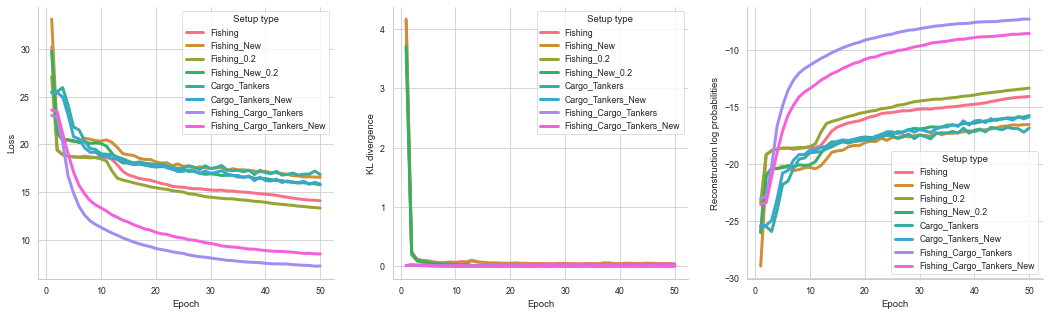

In [6]:
# Combine the different vessel type date frames 
df_compare = pd.concat([df, df_new])
df_compare.reset_index(drop=True, inplace=True)

# Plot the learning curves
hue = "Setup type"
hue_order = ["Fishing", "Fishing_New", "Fishing_0.2", "Fishing_New_0.2", "Cargo_Tankers", "Cargo_Tankers_New", 
             "Fishing_Cargo_Tankers", "Fishing_Cargo_Tankers_New"]
summary_models_fish_carg_tank.plot_curves(df_compare[df_compare["Data set type"] == "Validation"], hue, hue_order)